# King County Realestate Analysis and Modelling.

## Business Problem

##  Introduction
The realestate business has for a long time been of great interest to investors. Any party interested in investing in the realestate business will undoubtedly benefit from prior analysis of already existing data on the state of the market in order to minimize risk and maximize ROI. 
We got data from various sources such as the `kc_house_data.csv` file from Kaggle that we are going to perform anlysis and modelling on.

### Stakeholders Name: ALPHA TENNENT

## 1. Project Overview
in our analysis, we explored the data provided by Alpha Tennent Stakeholders and build a multiple linear regression model with some of the features stipulated in the dataset. Hencefourth, the analaysis done and the results came to a solution and on the following factors that have a significant impact on the price of the King County Dataset:

* Have a house by the waterfront
* Increase the number of bathrooms as the number of bedrooms increases
* Improve the overall grade of the home
* Strive to maintain the house to ensure that its in good condition
* Increase the number of floors and the size of the basement

### 1.1 Problem Statement
We will be reviewing building grade, square-footage of living space, and location-related factors such as proximity to schools, coffee shops, parks, and scientology churches to determine which factors are highly correlated with home sale prices.

### 1.2 Objective

#### Main Objective
The main objective is to come up with a predictive /accurate model that is an improvement of the baseline model for better house price prediction in King County.

#### Specific Objectives
- To find out how renovation status affects sale price?
- To determine whether how the number of bedrooms is related to the pricing of the house?
- To determine if the floor number affects the pricing of the house?
- To relate the year built affects/ is related to the house pricing?
- To find whether the condition of the house is related to the house pricing?

### 1.3 Experimental Design Taken.
Implement changes as we go on with the project

This phase is broken down into four tasks together with its projected outcome or output in detail:

Collect Initial Data
Describe Data
Explore Data
Verify Data Quality
There was no need to collect any data for this project as it was already provided by the stakeholder. The data consists of house data from King County and is in .csv format.

## 2. Data Understanding

### 2.1 Columns Descriptions

The main dataset we are using comes from the King County housing [dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) that contains information on house sales between May 2014 and May 2015 consist of the following variables:

- date: Date of house sale
- price: The price which the house sold for
- bedrooms: How many bedrooms the house has
- bathrooms: How many bathrooms the house has
- sqft_living: How much square footage the house has
- sqft_lot: How much square footage the lot has
- floors: How many floors the house has
- waterfront: Whether the house is on the - - - - waterfront. Originally contained ‘YES’ or ‘NO’, converted to 0 or 1 for comparative purposes
- view: Whether the house has a view and whether it’s fair, average, good, or excellent. Converted to numberical (0-4) for comparative purposes
- condition: overall condition of the house: Poor, Fair, Average, Good, Very Good
- grade: Numerical grading for house
sqft_above: How much of the houses square footage is above ground
- sqft_basement: How much of the square footage is in the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated, if applicable
- zipcode: House zipcode
- lat: House’s latitude coordinate
- long: House’s longitude coordinate
- sqft_living15: Average size of living space for the closest 15 houses
- sqft_lot15: Average size of lot for the - - closest 15 houses

In [65]:
#importing the main libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [66]:
#import main data file
kc_hses = pd.read_csv('data/kc_house_data.csv')

In [67]:
print(kc_hses.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [68]:
kc_hses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [69]:
#drop 'id' and 'date'
cols_to_drop = ['date', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
kc_hses.drop(cols_to_drop, axis=1, inplace=True)
kc_hses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 2.6+ MB


### 2.2 Univatiate analysis

/home/josh/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


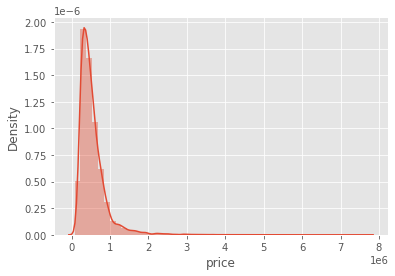

In [70]:
#Visualize price
sns.distplot(kc_hses['price'], kde=True)
plt.show();

Price is normally distributed although skewed to the right. There may be outliers causing the skew. In the context of realestate these outliers may be valid and may not warrant dropping.

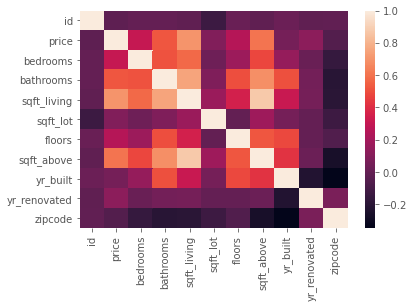

In [71]:
#Plot heatmap of correlation
sns.heatmap(kc_hses.corr(), annot=False)
plt.show();

We see Strong positive correlation between `price` and the features: `bathrooms`, `sqft_living` and `sqft_above`, 

In [78]:
kc_hses.nunique()

id               21420
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
dtype: int64

In [81]:
kc_hses['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

The `bathrooms` feature seems to contain **float** values which should be integers

In [84]:
kc_hses['bathrooms'] = kc_hses['bathrooms'].apply(lambda x: int(round(x, 0)))
kc_hses['bathrooms'].value_counts()

2    13847
1     3931
3     2527
4     1201
5       57
6       24
8        4
0        4
7        2
Name: bathrooms, dtype: int64

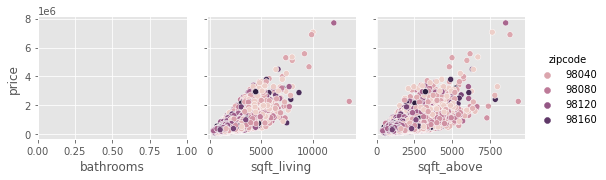

In [86]:
#plot scatterplots 
x_vars = ['bathrooms', 'sqft_living', 'sqft_above']
y_vars = ['price']
hue = kc_hses['zipcode']
sns.pairplot(kc_hses, x_vars=x_vars, y_vars=y_vars, hue='zipcode')
plt.show();

## Data Preparation

## Analysis and Modeling

## Results 

## Conclusion

## Recommendations